# House prediction Assignment.

Objective: Analyze house price determinants such as size, location, and amenities.

The primary objective of this project is to build a predictive model to estimate house prices based on various features such as area, number of bedrooms, amenities, and other property attributes. Additionally, the project aims to perform exploratory data analysis (EDA) to uncover patterns, relationships, and insights in the dataset that influence house prices.

# References:
Main Source => https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Kaggle => https://www.kaggle.com/code/vishwaaradhyamath/houseprediction-eda-regression-ipynb

GitHub=> https://github.com/vmaradhya2020/DataVisualizationEDA/blob/main/Houseprediction_EDA_Regression.ipynb

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Setup and Data Preparation.

In [48]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Housing.csv')

In [49]:
# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [50]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [51]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Step 2: Exploratory Data Analysis (EDA).


Visualizing Feature Distributions...


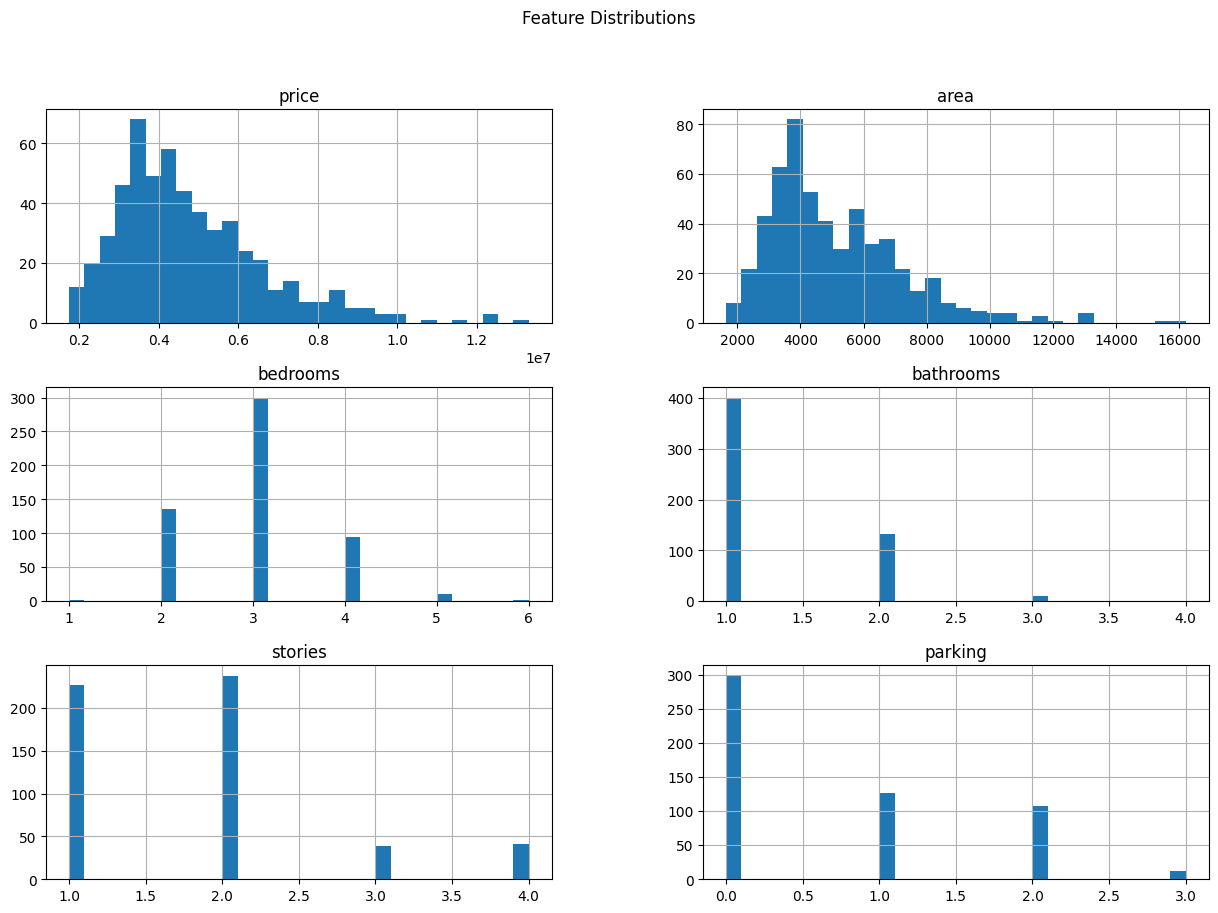

In [52]:
# Visualize Feature Distributions
print("\nVisualizing Feature Distributions...")
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


Box Plots to Detect Outliers...


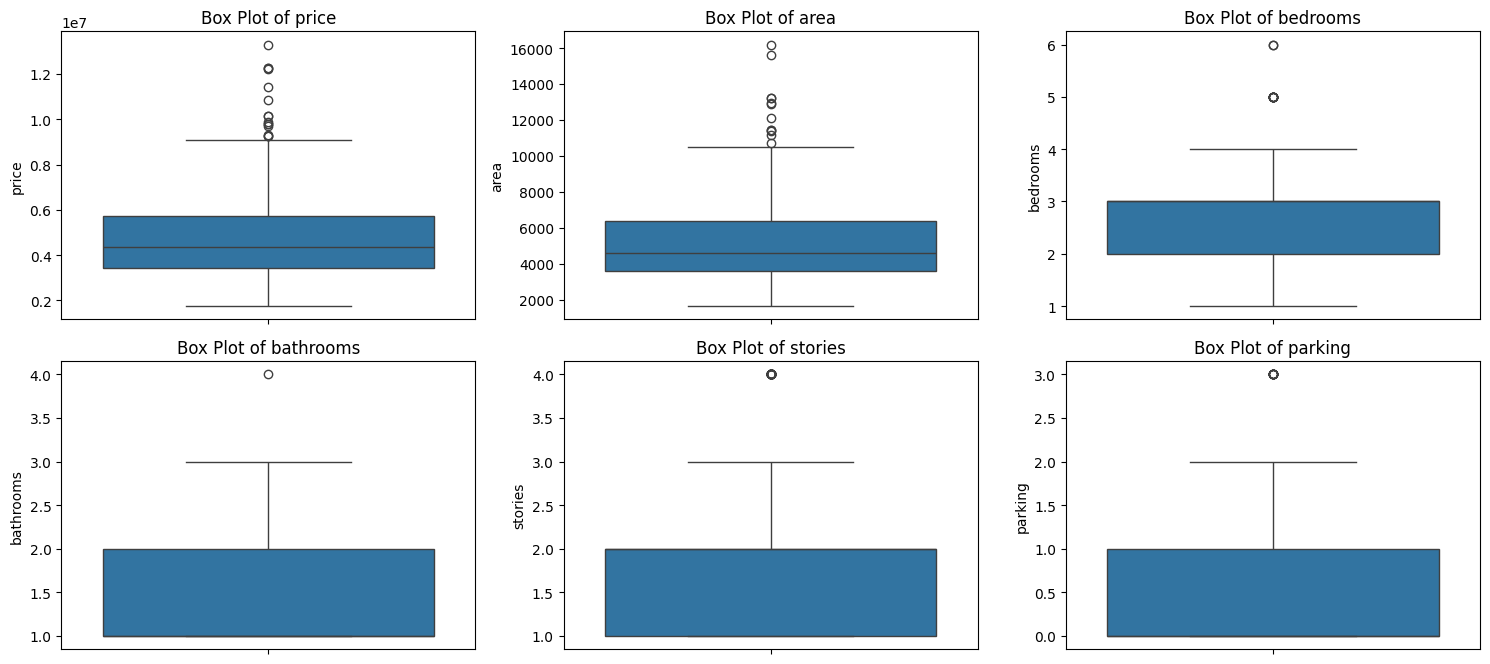

In [53]:
# Box plots to detect outliers
print("\nBox Plots to Detect Outliers...")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()


Correlation Matrix...


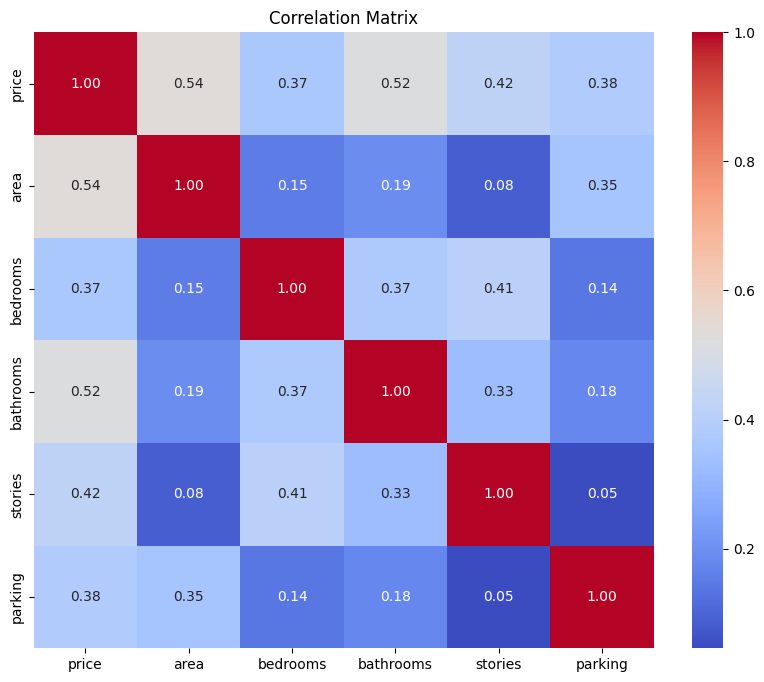

In [54]:
# Correlation Matrix
print("\nCorrelation Matrix...")
correlation_matrix = df.corr(numeric_only=True) # Add numeric_only=True
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


Categorical Data Analysis...

Frequency Table for mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64


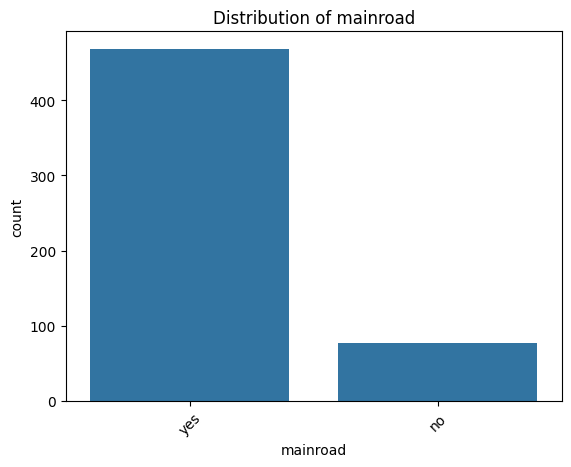


Frequency Table for guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64


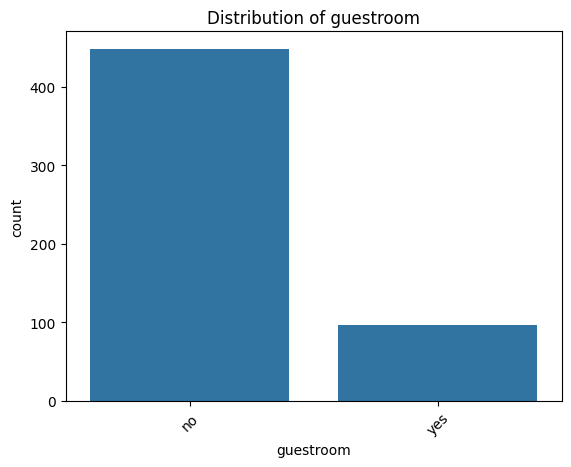


Frequency Table for basement:
basement
no     354
yes    191
Name: count, dtype: int64


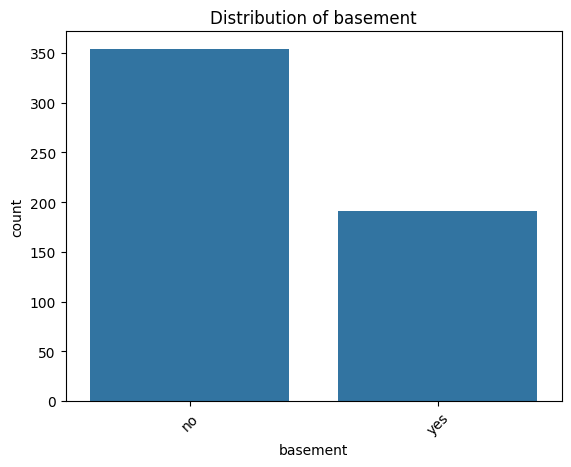


Frequency Table for hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64


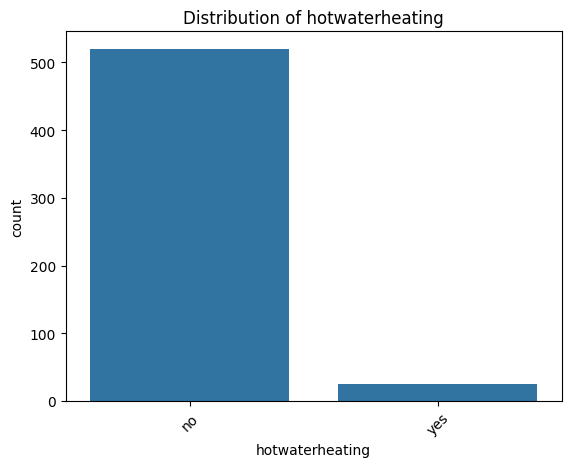


Frequency Table for airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64


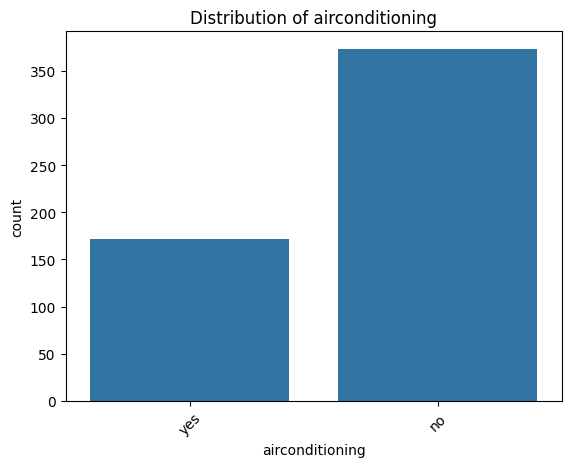


Frequency Table for prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64


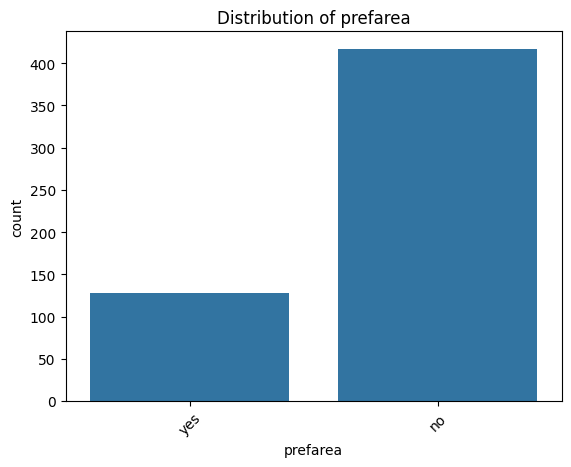


Frequency Table for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


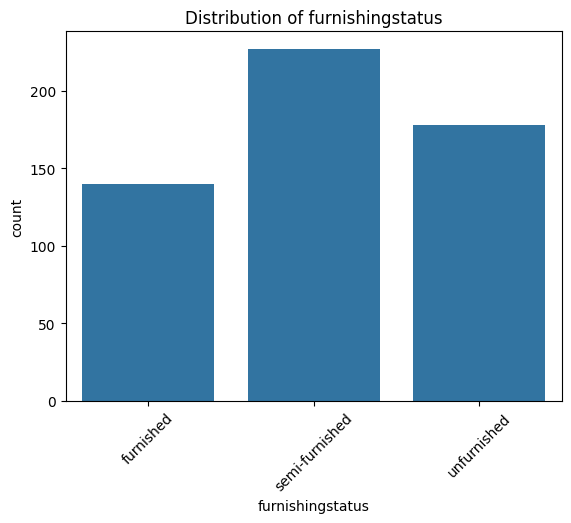

In [55]:
# Analyze Categorical Data
print("\nCategorical Data Analysis...")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nFrequency Table for {column}:")
    print(df[column].value_counts())

    # Bar plot for categorical variables
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

# Step 3: Preprocessing Steps.

In [56]:
# Encode Categorical Variables
print("\nEncoding Categorical Variables...")
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


Encoding Categorical Variables...


In [57]:
# Normalize Numerical Features
print("\nNormalizing Numerical Features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['price']))
y = df['price']


Normalizing Numerical Features...


In [58]:
# Split Data into Training and Testing Sets
print("\nSplitting Data into Training and Testing Sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Splitting Data into Training and Testing Sets...


# Step 4: Build and Evaluate Linear Regression Model.

In [59]:
# Train a Linear Regression Model
print("\nTraining Linear Regression Model...")
model = LinearRegression()
model.fit(X_train, y_train)


Training Linear Regression Model...


LinearRegression()

In [60]:
# Make Predictions
y_pred = model.predict(X_test)

In [61]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 1754318687330.67
R-squared (R2): 0.65



Scatter Plot of Actual vs Predicted Values...


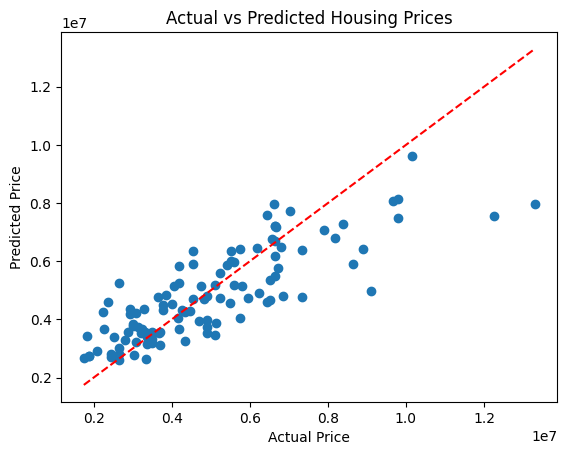

In [62]:
# Scatter Plot of Actual vs Predicted Values
print("\nScatter Plot of Actual vs Predicted Values...")
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Housing Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [63]:
# Feature Importance (Coefficients from Linear Regression)
print("\nFeature Importance (Linear Regression Coefficients):")
coefficients = pd.DataFrame({
    'Feature': df.drop(columns=['price']).columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


Feature Importance (Linear Regression Coefficients):
                            Feature    Coefficient
2                         bathrooms  549420.501241
0                              area  511615.563777
9               airconditioning_yes  367817.894916
3                           stories  353158.429856
10                     prefarea_yes  267018.660812
4                           parking  193542.781675
7                      basement_yes  186194.150506
8               hotwaterheating_yes  143233.206250
5                      mainroad_yes  128151.921295
6                     guestroom_yes   88590.213462
1                          bedrooms   56615.572458
11  furnishingstatus_semi-furnished  -62550.297211
12     furnishingstatus_unfurnished -193987.781088



Bar Plot of Feature Importance...


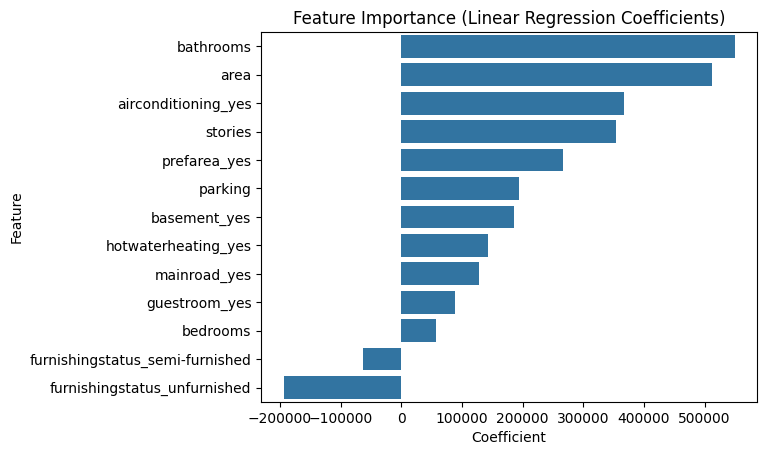

In [64]:
# Bar Plot of Feature Importance
print("\nBar Plot of Feature Importance...")
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

## Step 5: Summary of Insights.

In [65]:
print("\nSummary of Insights:")
print("1. Key Observations:")
print("- Strong positive correlations between 'area' and 'price'.")
print("- Moderate correlations between 'bedrooms' and 'price'.")
print("- Houses with air conditioning ('airconditioning_yes') tend to have higher prices.")
print("- Furnished houses ('furnishingstatus_furnished') are generally more expensive.")

print("\n2. Influential Variables:")
print("- 'area', 'bedrooms', and 'airconditioning' appear to have significant impacts on 'price'.")

print("\n3. Recommendations:")
print("- Apply log transformations to reduce skewness in certain features.")
print("- Use regression models like Linear Regression, Random Forest, or Gradient Boosting to predict housing prices.")
print("- Create interaction terms or polynomial features to capture non-linear relationships.")



Summary of Insights:
1. Key Observations:
- Strong positive correlations between 'area' and 'price'.
- Moderate correlations between 'bedrooms' and 'price'.
- Houses with air conditioning ('airconditioning_yes') tend to have higher prices.
- Furnished houses ('furnishingstatus_furnished') are generally more expensive.

2. Influential Variables:
- 'area', 'bedrooms', and 'airconditioning' appear to have significant impacts on 'price'.

3. Recommendations:
- Apply log transformations to reduce skewness in certain features.
- Use regression models like Linear Regression, Random Forest, or Gradient Boosting to predict housing prices.
- Create interaction terms or polynomial features to capture non-linear relationships.
